In [ ]:
%%capture
!git clone https://github.com/alphaameer007/RHM_FYP

In [22]:
!pip install keras-tcn --no-dependencies 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
#df=pd.read_csv('turkey.csv')
df

FileNotFoundError: ignored

In [ ]:

df

,time,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,1/1/2018 0:00,380.047791,5.311336,416.328908,259.994904
1,1/1/2018 0:10,453.769196,5.672167,519.917511,268.641113
2,1/1/2018 0:20,306.376587,5.216037,390.900016,272.564789
3,1/1/2018 0:30,419.645904,5.659674,516.127569,271.258087
4,1/1/2018 0:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
52555,12/31/2018 23:10,2963.980957,11.404030,3397.190793,80.502724
52556,12/31/2018 23:20,1684.353027,7.332648,1173.055771,84.062599
52557,12/31/2018 23:30,2201.106934,8.435358,1788.284755,84.742500
52558,12/31/2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
df.drop('time', inplace=True, axis=1)

In [ ]:
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=pd.read_csv('turkey.csv')
df.drop('time', inplace=True, axis=1)
cols = df.columns.tolist()
cols[0], cols[3] = cols[3], cols[0]
df = df[cols]
df


In [ ]:
df

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
52555,2963.980957,11.404030,3397.190793,80.502724
52556,1684.353027,7.332648,1173.055771,84.062599
52557,2201.106934,8.435358,1788.284755,84.742500
52558,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
#max_values = df.max()              #normalizing data in between range [0,1]
#df = df.div(max_values) 

In [ ]:
df

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
52555,2963.980957,11.404030,3397.190793,80.502724
52556,1684.353027,7.332648,1173.055771,84.062599
52557,2201.106934,8.435358,1788.284755,84.742500
52558,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
#switching columns to make LV activePower (kW) last column so that it will be easy
# to prepare training and test datasets
cols = df.columns.tolist()
cols[0], cols[3] = cols[3], cols[0]
df = df[cols]

In [ ]:
df=df['LV ActivePower (kW)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(df.values.reshape(-1,1))
scaled_data.shape
#scaled_data = np.squeeze(scaled_data)
#scaled_data.shape

(52560, 1)

In [ ]:
data.shape

NameError: ignored

In [ ]:
df = scaled_data
df.shape
df

array([[-0.78873371],
       [-0.7480172 ],
       [-0.8294225 ],
       ...,
       [ 0.21704171],
       [ 0.39078896],
       [ 0.55911527]])

In [ ]:
df.shape

(52560, 1)

In [ ]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(df)):
    x.append(df[i - lookback_window:i])
    y.append(df[i])
x = np.array(x)
y = np.array(y)

In [ ]:
print(x.shape)
print(y.shape)

(51840, 720, 1)
(51840, 1)


In [ ]:
print(y)

[0.0326516  0.04736276 0.05023323 ... 0.32723358 0.3157517  0.30965196]


In [ ]:
df[432+1]

array([0.21540027, 0.70448549, 0.91280022, 0.98172128, 0.97726752,
       0.04736276])

In [ ]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)


x_train : (51120, 720, 1)
x_test : (720, 720, 1)
y_train : (51120, 1)
y_test : (720, 1)


In [ ]:
51840+720

52560

In [ ]:
df[431]

array([0.5493698 , 0.60997117, 1.        , 0.95625377])

In [ ]:
x_train[0]

array([[0.7222129 , 0.21071704, 0.11564692, 0.10502234],
       [0.74623031, 0.22503231, 0.14442153, 0.1253945 ],
       [0.75712948, 0.20693623, 0.10858334, 0.08466405],
       ...,
       [0.19712844, 0.14154479, 0.03086218, 0.02038635],
       [0.19702649, 0.13872388, 0.02403727, 0.0135909 ],
       [0.19692454, 0.13590298, 0.01721236, 0.00679545]])

In [ ]:
df[432]

array([0.54131557, 0.72062099, 1.        , 0.99583008])

In [ ]:
y_train[0]

0.009888632135421493

In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 1), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
    patience=15,
    start_from_epoch=15,
   restore_best_weights=True,
   mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_2 (TCN)                 (None, 32)                195584    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 195,617
Trainable params: 195,617
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 48s 25ms/step - loss: 0.2953 - mean_absolute_percentage_error: 245.0199 - val_loss: 0.0444 - val_mean_absolute_percentage_error: 16.5551
Epoch 2/50
1598/1598 [==============================] - 39s 25ms/step - loss: 0.0925 - mean_absolute_percentage_error: 77.4251 - val_loss: 0.0285 - val_mean_absolute_percentage_error: 16.2363
Epoch 3/50
1598/1598 [============================

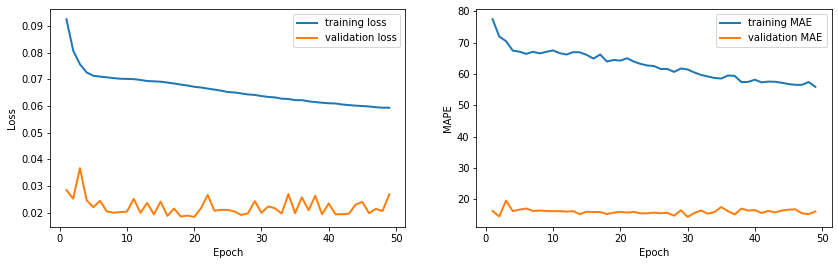

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

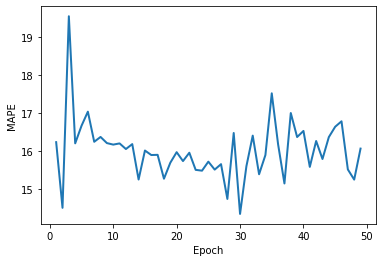

In [ ]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

23/23 [==============================] - 1s 10ms/step
(720, 720, 1)
(720, 1)
(720, 1)


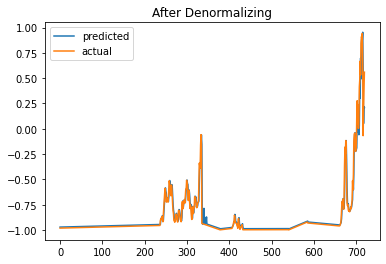

In [ ]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
print(x_test.shape)
print(y_test.shape)
print(p.shape)

(2560, 144, 1)
(2560, 1)
(2560, 1)


In [ ]:
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame(y_test)
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
  

error = mape(result['actual_data'],result['predicted_data'])
  

print("Mean absolute percentage error : " + str(error))

Mean absolute percentage error : 0.023107194485515258


In [1]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.4 MB/s eta 0:00:00


In [2]:
from PyEMD import EEMD 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd

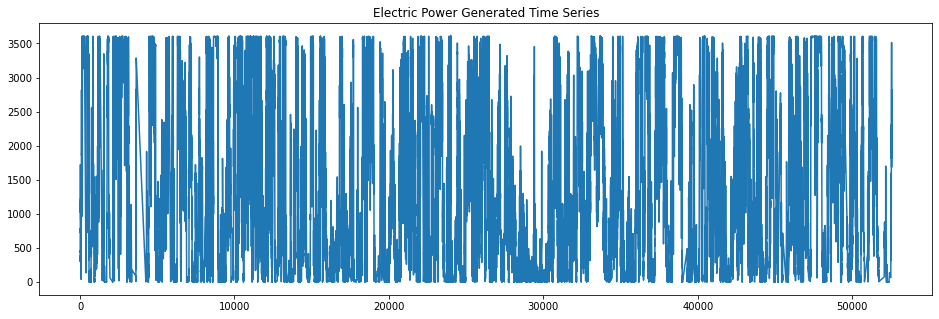

In [6]:
df=pd.read_csv('turkey.csv')
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=df['LV ActivePower (kW)']
data = df.to_numpy()
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("Electric Power Generated Time Series")
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(data.reshape(-1,1))
scaled_data.shape
scaled_data = np.squeeze(scaled_data)
scaled_data.shape

(52560,)

In [8]:
in_sample = scaled_data; out_sample = scaled_data[-10000:]
print(in_sample.shape)

(52560,)


In [9]:
in_sample = in_sample.reshape(-1,1)
in_sample.shape

(52560, 1)

In [10]:
eemd = EEMD()
eemd.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)

(52560, 1) (52560, 1)


In [11]:


imfs1 = eemd(in_sample, t)

print(imfs1.shape)

(18, 52560)


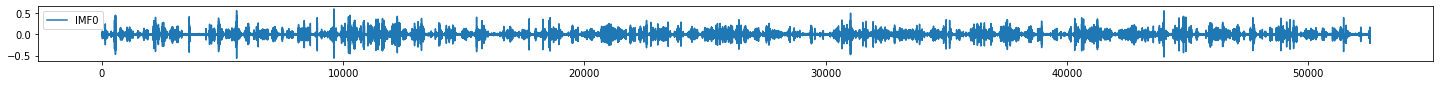

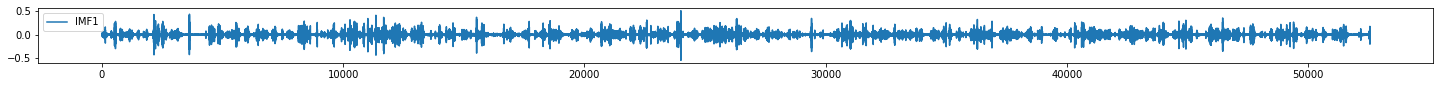

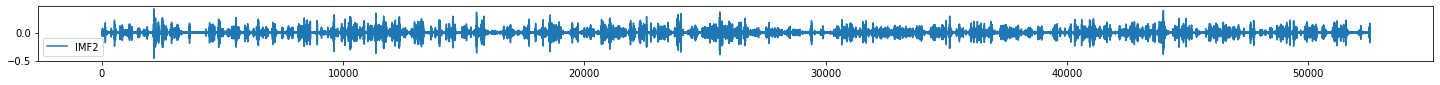

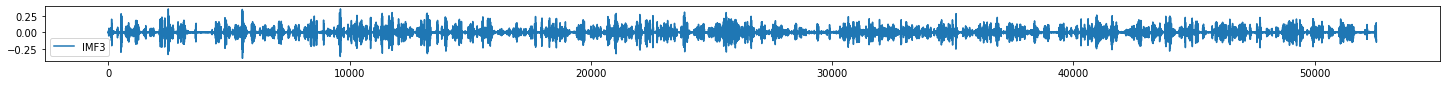

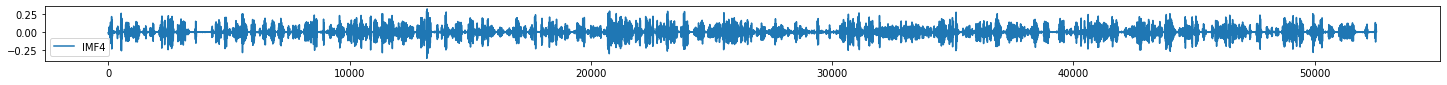

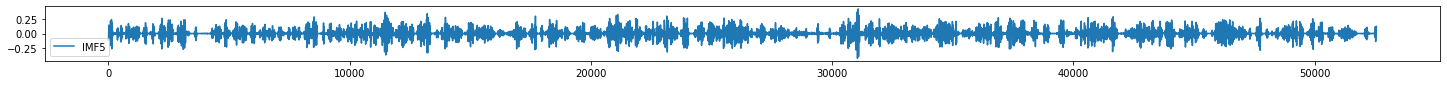

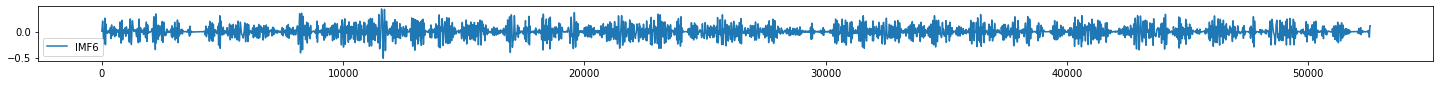

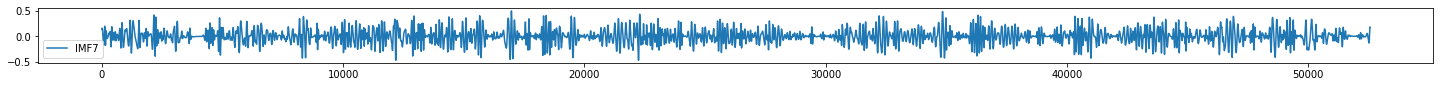

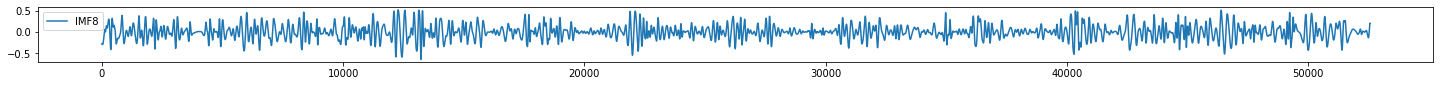

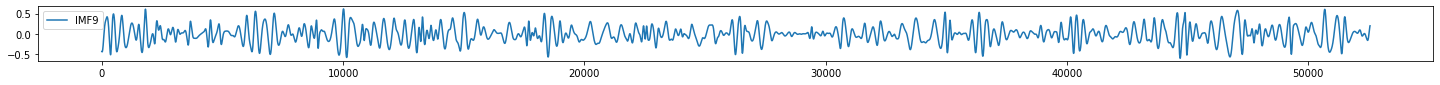

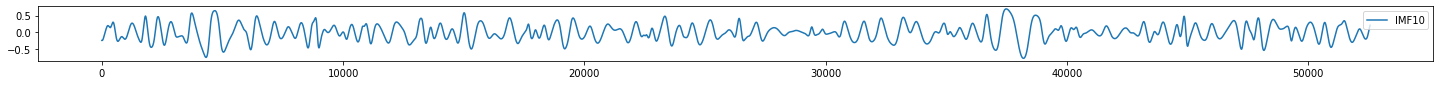

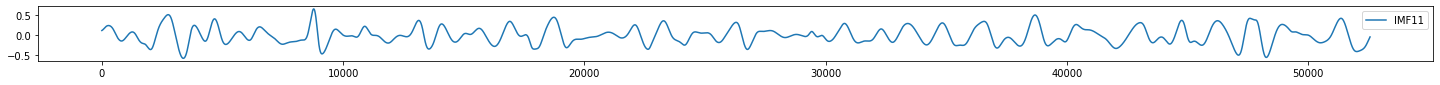

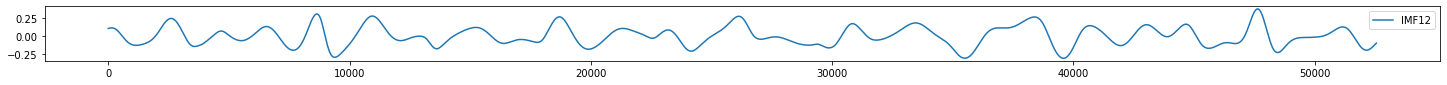

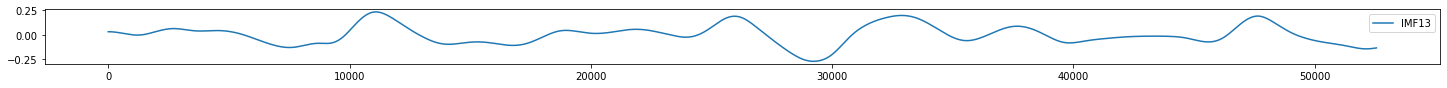

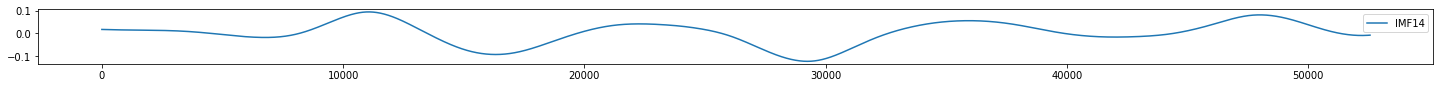

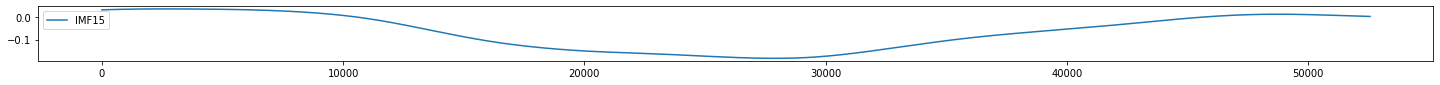

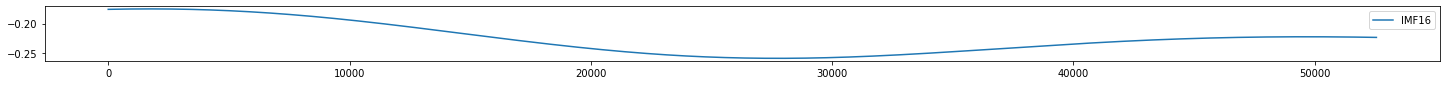

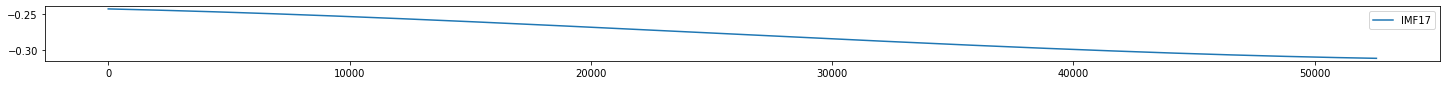

In [13]:
for i in range(len(imfs1)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs1[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

(0.0, 1000.0)

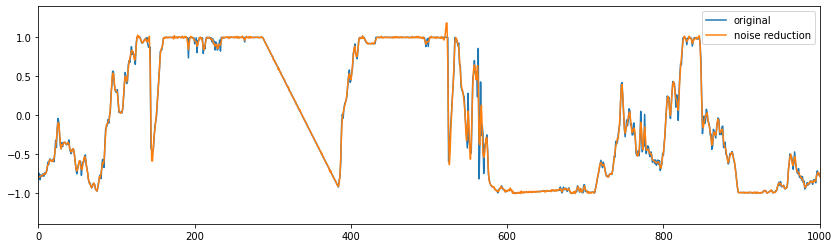

In [14]:
plt.figure(figsize=(14, 4))
data_eemd = in_sample  - imfs1[0] 
plt.plot(in_sample,label='original')
plt.plot(data_eemd,label='noise reduction')
plt.legend()
plt.xlim(0, 1000)

In [15]:
import plotly.express as px

In [16]:
fig=px.line(y=in_sample)
fig.add_scatter(y=data_eemd)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [17]:
data_eemd.shape

(52560,)

In [18]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(data_eemd)):
    x.append(data_eemd[i - lookback_window:i])
    y.append(data_eemd[i])
x = np.array(x)
y = np.array(y)

In [19]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [24]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 1), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
   patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 32)                195584    
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 195,617
Trainable params: 195,617
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 60s 26ms/step - loss: 0.4787 - mean_absolute_percentage_error: 245.6090 - val_loss: 0.0882 - val_mean_absolute_percentage_error: 13.6203
Epoch 2/50
1598/1598 [==============================] - 41s 26ms/step - loss: 0.0829 - mean_absolute_percentage_error: 69.6822 - val_loss: 0.0395 - val_mean_absolute_percentage_error: 6.1377
Epoch 3/50
1598/1598 [==============================]

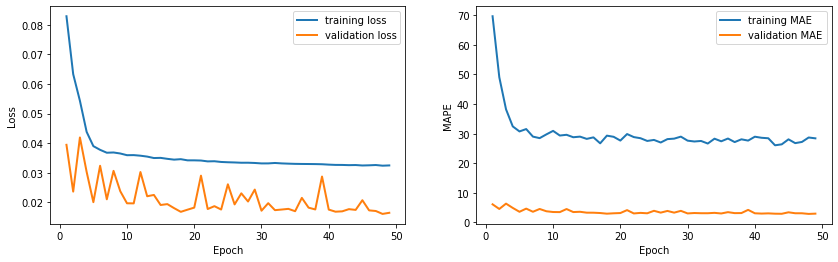

In [25]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

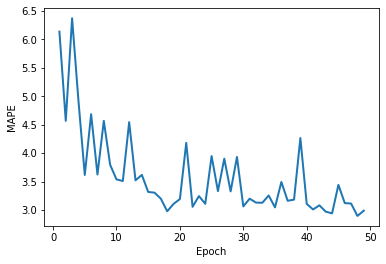

In [26]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

23/23 [==============================] - 1s 11ms/step
(720, 720)
(720,)
(720, 1)


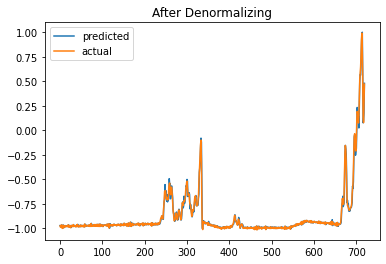

In [27]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()

In [28]:
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=pd.read_csv('turkey.csv')
df.drop('time', inplace=True, axis=1)
cols = df.columns.tolist()
cols[0], cols[3] = cols[3], cols[0]
df = df[cols]
df

,Wind Direction (°),Wind Speed (m/s),wind energy,LV ActivePower (kW)
0,259.994904,5.311336,416.328908,380.047791
1,268.641113,5.672167,519.917511,453.769196
2,272.564789,5.216037,390.900016,306.376587
3,271.258087,5.659674,516.127569,419.645904
4,265.674286,5.577941,491.702972,380.650696
...,...,...,...,...
52555,80.502724,11.404030,3397.190793,2963.980957
52556,84.062599,7.332648,1173.055771,1684.353027
52557,84.742500,8.435358,1788.284755,2201.106934
52558,84.297913,9.421366,2418.382503,2515.694092


In [29]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [30]:
data

array([[0.7222008 , 0.20866598, 0.11497228, 0.10563314],
       [0.74621926, 0.22301844, 0.14376884, 0.1259914 ],
       [0.75711891, 0.20487534, 0.10790331, 0.08528875],
       ...,
       [0.23536411, 0.33292762, 0.49636185, 0.60852085],
       [0.23412908, 0.37214723, 0.67152253, 0.69539448],
       [0.22850854, 0.39434099, 0.77182165, 0.77955763]])

In [40]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(data)):
    x.append(data[i - lookback_window:i,:])
    y.append(data[i,-1])
x = np.array(x)
y = np.array(y)

In [41]:
x[719]

array([[0.67478093, 0.08610855, 0.16279946, 0.18377636],
       [0.11194499, 0.26239948, 0.24134575, 0.20990152],
       [0.12087405, 0.25165626, 0.21174421, 0.18634248],
       ...,
       [0.19719542, 0.14214221, 0.03695299, 0.02784573],
       [0.19709347, 0.13931397, 0.03012287, 0.02105492],
       [0.19699152, 0.13648573, 0.02329275, 0.01426411]])

In [42]:
y

array([0.20990152, 0.18634248, 0.1625905 , ..., 0.60852085, 0.69539448,
       0.77955763])

In [43]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = readings_per_day * 5

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [44]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 4), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
   patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 32)                196640    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 50s 26ms/step - loss: 0.2692 - mean_absolute_percentage_error: 8506.0254 - val_loss: 0.0590 - val_mean_absolute_percentage_error: 993.8684
Epoch 2/50
1598/1598 [==============================] - 41s 26ms/step - loss: 0.0600 - mean_absolute_percentage_error: 631.0559 - val_loss: 0.0360 - val_mean_absolute_percentage_error: 586.2236
Epoch 3/50
1598/1598 [========================

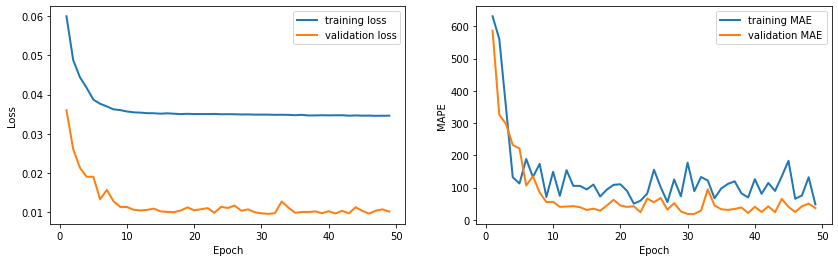

In [46]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

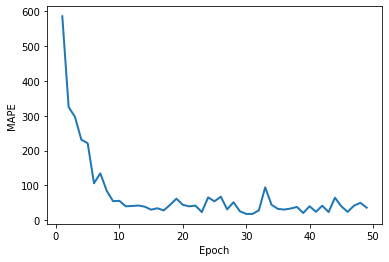

In [47]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

23/23 [==============================] - 1s 12ms/step
(720, 720, 4)
(720,)
(720, 1)


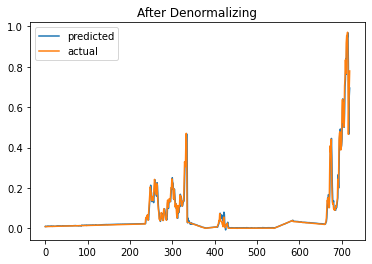

In [48]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()